<a href="https://colab.research.google.com/github/Karlajack/Machine_Learning_24e/blob/main/Wk1_Data_Cleaning_Project_Chips_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chips_Semi-Conductors

# Import Libraries and Data

Import Libraries and Data

In [50]:
# Import Necessary Libraries
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings(action="ignore")

In [202]:
# Import Data
url='//content/chip_dataset.csv'
df=pd.read_csv(url)
df.head(2)

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/2000,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/2000,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN


# EDA and Data Cleaning

**EDA**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [9]:
df.dtypes

Product                   object
Type                      object
Release Date              object
Process Size (nm)         object
TDP (W)                   object
Die Size (mm^2)           object
Transistors (million)     object
Freq (GHz)               float64
Foundry                   object
Vendor                    object
FP16 GFLOPS              float64
FP32 GFLOPS              float64
FP64 GFLOPS              float64
dtype: object

In [81]:
df.columns

Index(['Product', 'Type', 'Release Date', 'Process Size (nm)', 'TDP (W)',
       'Die Size (mm^2)', 'Transistors (million)', 'Freq (GHz)', 'Foundry',
       'Vendor', 'FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'],
      dtype='object')

In [189]:
df.isnull().sum()

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64

**Exploring Missingness**

Text(0.5, 1.0, 'missingness values')

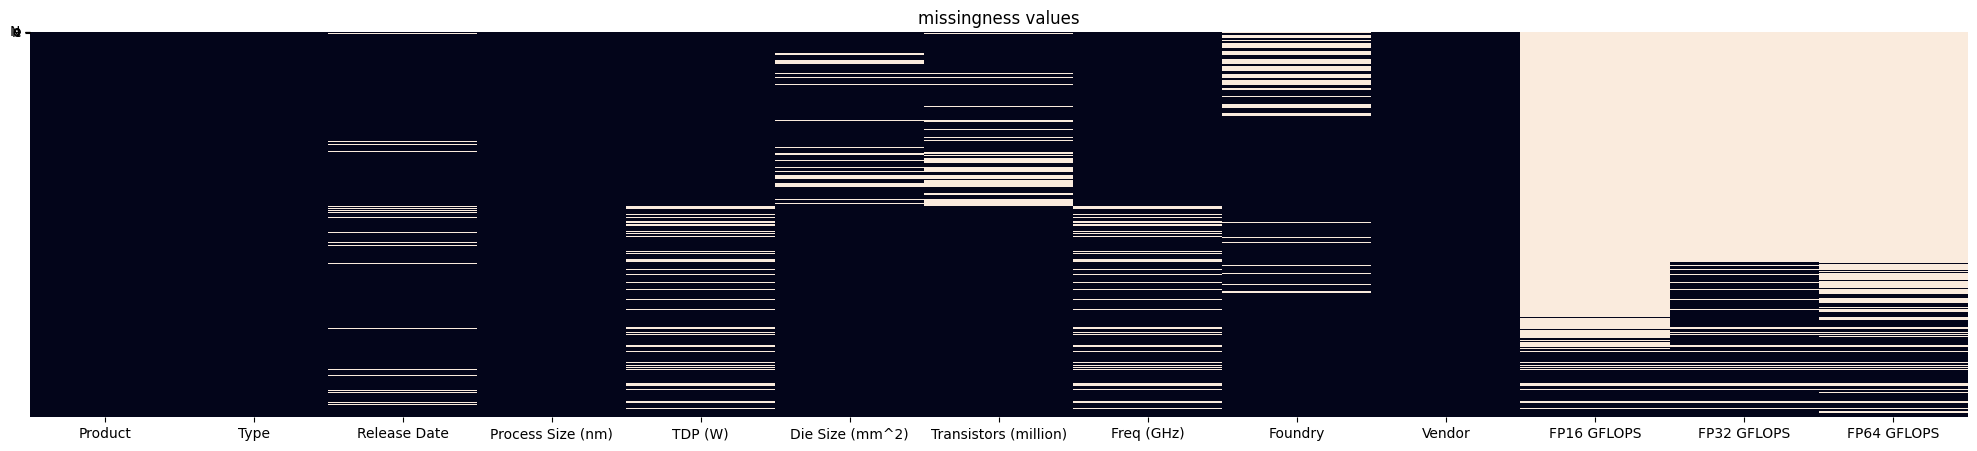

In [6]:
# Missingness in whole dataset
plt.figure(figsize=(25,5))
sns.heatmap(df.isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

Text(0.5, 1.0, 'missingness values')

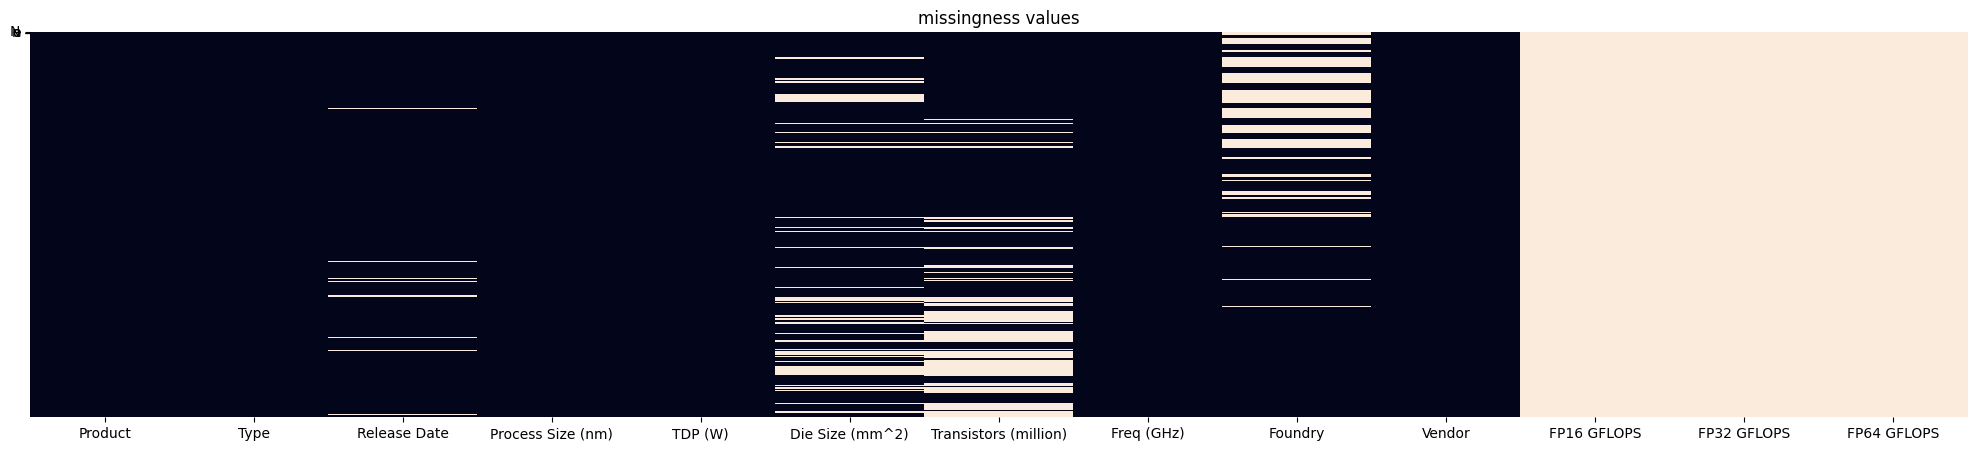

In [7]:
# Missingness in CPUs
plt.figure(figsize=(25,5))
sns.heatmap(df.loc[df.Type=='CPU'].isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

Text(0.5, 1.0, 'missingness values')

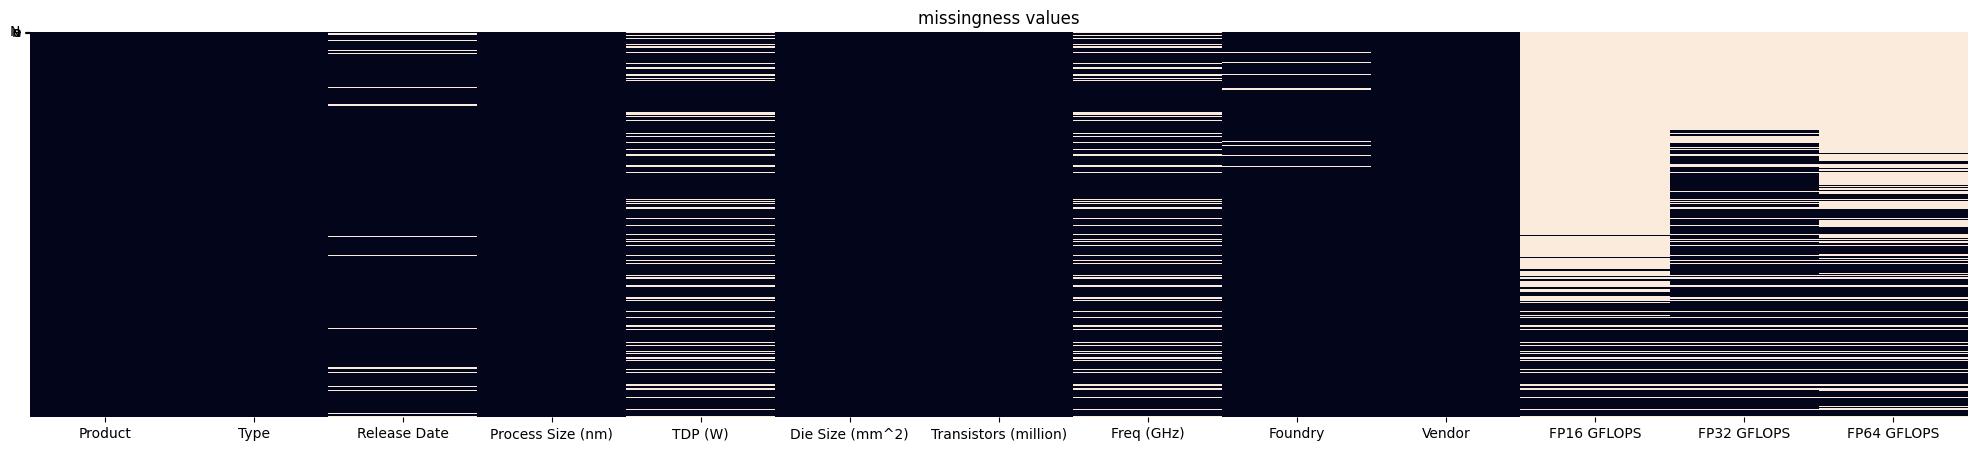

In [12]:
# Missingness in GPUs
plt.figure(figsize=(25,5))
sns.heatmap(df.loc[df.Type=='GPU'].isnull(),yticklabels="None",cbar=False)
plt.title("missingness values")

In [13]:
Total_missing=df.isnull().sum().sort_values(ascending=False)

Total=df.isnull().count().sort_values(ascending=False)

percent=Total_missing/Total*100
percent

Die Size (mm^2)           7.118301
FP16 GFLOPS              83.822042
FP32 GFLOPS              65.925177
FP64 GFLOPS              74.155713
Foundry                  12.436805
Freq (GHz)                8.837209
Process Size (nm)         0.000000
Product                   0.000000
Release Date              4.024267
TDP (W)                   8.837209
Transistors (million)    11.223458
Type                      0.000000
Vendor                    0.000000
dtype: float64

In [15]:
missing=pd.concat([Total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)

missing.index.name='variable'

missing=missing[missing['total_missing']>0]
missing

,total_missing,percentage_missing
variable,,
FP16 GFLOPS,4145,83.822042
FP64 GFLOPS,3667,74.155713
FP32 GFLOPS,3260,65.925177
Foundry,615,12.436805
Transistors (million),555,11.223458
TDP (W),437,8.837209
Freq (GHz),437,8.837209
Die Size (mm^2),352,7.118301
Release Date,199,4.024267


#Dropping non_consequential column with missingness

In [203]:
df=df.drop(['FP16 GFLOPS','FP64 GFLOPS'],axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP32 GFLOPS            1685 non-null   float64
dtypes: float64(2), object(9)
memory usage: 425.1+ KB


In [204]:
df['Release Date'] = pd.to_datetime(df['Release Date'],format="%M/%d/%Y")

df['Release Date']

0      2000-01-05 00:06:00
1      2000-01-31 00:10:00
2      2000-01-14 00:08:00
3      2000-01-31 00:10:00
4      2000-01-31 00:10:00
               ...        
4940                   NaT
4941   2024-01-08 00:01:00
4942   2024-01-08 00:01:00
4943   2024-01-08 00:01:00
4944   2024-01-05 00:01:00
Name: Release Date, Length: 4945, dtype: datetime64[ns]

In [205]:
df = df.rename(columns={'Release Date': 'release_date','Process Size (nm)': 'Process_Size_nm',
                        'TDP (W)': 'TDP_W','Die Size (mm^2)': 'Die_Size_mm2',
                        'Transistors (million)': 'Transistors_million','Freq (GHz)': 'Freq_GHz',
                        'FP32 GFLOPS':'FP32_GFLOPS'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product              4945 non-null   object        
 1   Type                 4945 non-null   object        
 2   release_date         4746 non-null   datetime64[ns]
 3   Process_Size_nm      4945 non-null   object        
 4   TDP_W                4508 non-null   object        
 5   Die_Size_mm2         4593 non-null   object        
 6   Transistors_million  4390 non-null   object        
 7   Freq_GHz             4508 non-null   float64       
 8   Foundry              4330 non-null   object        
 9   Vendor               4945 non-null   object        
 10  FP32_GFLOPS          1685 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 425.1+ KB


In [207]:
df['TDP_W'] = np.floor(pd.to_numeric(df['TDP_W'], errors='coerce'))
df['TDP_W'] = df['TDP_W'].astype('float')

df['Process_Size_nm'] = np.floor(pd.to_numeric(df['Process_Size_nm'], errors='coerce'))
df['Process_Size_nm'] = df['Process_Size_nm'].astype('float')

df['Die_Size_mm2'] = np.floor(pd.to_numeric(df['Die_Size_mm2'], errors='coerce'))
df['Die_Size_mm2'] = df['Die_Size_mm2'].astype('float')

df['Transistors_million'] = np.floor(pd.to_numeric(df['Transistors_million'], errors='coerce'))
df['Transistors_million'] = df['Transistors_million'].astype('float')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product              4945 non-null   object        
 1   Type                 4945 non-null   object        
 2   release_date         4746 non-null   datetime64[ns]
 3   Process_Size_nm      4887 non-null   float64       
 4   TDP_W                4054 non-null   float64       
 5   Die_Size_mm2         4229 non-null   float64       
 6   Transistors_million  4139 non-null   float64       
 7   Freq_GHz             4508 non-null   float64       
 8   Foundry              4330 non-null   object        
 9   Vendor               4945 non-null   object        
 10  FP32_GFLOPS          1685 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 425.1+ KB


In [208]:
gpu= df[df['Type']=='GPU']
gpu.head()

,Product,Type,release_date,Process_Size_nm,TDP_W,Die_Size_mm2,Transistors_million,Freq_GHz,Foundry,Vendor,FP32_GFLOPS
2231,3dfx Voodoo4 4000 AGP,GPU,NaT,250.0,15.0,112.0,14.0,166.0,TSMC,3dfx,NaN
2232,3dfx VSA-100,GPU,2000-01-22 00:06:00,250.0,NaN,112.0,14.0,NaN,TSMC,3dfx,NaN
2233,3dfx Voodoo4 4500 AGP,GPU,2000-01-13 00:10:00,250.0,15.0,112.0,14.0,166.0,TSMC,3dfx,NaN
2234,3dfx Voodoo4 4500 PCI,GPU,2000-01-13 00:10:00,250.0,15.0,112.0,14.0,166.0,TSMC,3dfx,NaN
2235,3dfx Voodoo4 4800 AGP,GPU,NaT,250.0,15.0,112.0,14.0,166.0,TSMC,3dfx,NaN


**Handling Missingness**

In [209]:
gpu.isnull().sum()

Product                   0
Type                      0
release_date            149
Process_Size_nm          58
TDP_W                   891
Die_Size_mm2            228
Transistors_million     251
Freq_GHz                437
Foundry                  78
Vendor                    0
FP32_GFLOPS            1029
dtype: int64

In [210]:
#Handling GPU missingness
gpu.Process_Size_nm = gpu.Process_Size_nm.fillna(gpu.Process_Size_nm.dropna().mean())
gpu['Die_Size_mm2']  = gpu['Die_Size_mm2'].fillna(gpu['Die_Size_mm2'].dropna().mean())
gpu.Transistors_million = gpu.Transistors_million.fillna(gpu.Transistors_million.dropna().mean())
gpu.TDP_W = gpu.TDP_W.fillna(gpu.TDP_W.dropna().mean())
gpu.Freq_GHz = gpu.Freq_GHz.fillna(gpu.Freq_GHz.dropna().mean())
gpu.FP32_GFLOPS = gpu.FP32_GFLOPS.fillna(gpu.FP32_GFLOPS.dropna().mean())
gpu.release_date = gpu.release_date.fillna(gpu.release_date.median())
gpu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2714 entries, 2231 to 4944
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product              2714 non-null   object        
 1   Type                 2714 non-null   object        
 2   release_date         2714 non-null   datetime64[ns]
 3   Process_Size_nm      2714 non-null   float64       
 4   TDP_W                2714 non-null   float64       
 5   Die_Size_mm2         2714 non-null   float64       
 6   Transistors_million  2714 non-null   float64       
 7   Freq_GHz             2714 non-null   float64       
 8   Foundry              2636 non-null   object        
 9   Vendor               2714 non-null   object        
 10  FP32_GFLOPS          2714 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 254.4+ KB


In [211]:
cpu= df[df['Type']=='CPU']
cpu.head()

,Product,Type,release_date,Process_Size_nm,TDP_W,Die_Size_mm2,Transistors_million,Freq_GHz,Foundry,Vendor,FP32_GFLOPS
0,AMD Athlon 1000,CPU,2000-01-05 00:06:00,180.0,54.0,120.0,37.0,1000.0,NaN,AMD,NaN
1,AMD Athlon 1000,CPU,2000-01-31 00:10:00,180.0,54.0,120.0,37.0,1000.0,NaN,AMD,NaN
2,AMD Athlon 1100,CPU,2000-01-14 00:08:00,180.0,60.0,120.0,37.0,1100.0,NaN,AMD,NaN
3,AMD Athlon 1133,CPU,2000-01-31 00:10:00,180.0,63.0,120.0,37.0,1133.0,NaN,AMD,NaN
4,AMD Athlon 1200,CPU,2000-01-31 00:10:00,180.0,66.0,120.0,37.0,1200.0,NaN,AMD,NaN


In [212]:
cpu.isnull().sum()

Product                   0
Type                      0
release_date             50
Process_Size_nm           0
TDP_W                     0
Die_Size_mm2            488
Transistors_million     555
Freq_GHz                  0
Foundry                 537
Vendor                    0
FP32_GFLOPS            2231
dtype: int64

In [213]:
#Handling CPU missingness
cpu['Die_Size_mm2']  = cpu['Die_Size_mm2'].fillna(cpu['Die_Size_mm2'].dropna().mean())
cpu.Transistors_million = cpu.Transistors_million.fillna(cpu.Transistors_million.dropna().mean())
cpu.TDP_W = cpu.TDP_W.fillna(cpu.TDP_W.dropna().mean())
cpu.release_date = cpu.release_date.fillna(cpu.release_date.median())
cpu.FP32_GFLOPS = cpu.FP32_GFLOPS.fillna(0)
cpu.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2231 entries, 0 to 2230
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product              2231 non-null   object        
 1   Type                 2231 non-null   object        
 2   release_date         2231 non-null   datetime64[ns]
 3   Process_Size_nm      2231 non-null   float64       
 4   TDP_W                2231 non-null   float64       
 5   Die_Size_mm2         2231 non-null   float64       
 6   Transistors_million  2231 non-null   float64       
 7   Freq_GHz             2231 non-null   float64       
 8   Foundry              1694 non-null   object        
 9   Vendor               2231 non-null   object        
 10  FP32_GFLOPS          2231 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 209.2+ KB


In [214]:
cpu['release_year'] =cpu['release_date'].dt.year
gpu['release_year'] =gpu['release_date'].dt.year



In [215]:



gpu['Transistors_million'] = np.log10(gpu.Transistors_million)
cpu['Transistors_million'] = np.log10(cpu.Transistors_million)
gpu['TDP_W'] = np.log10(gpu.TDP_W)
cpu['TDP_W'] = np.log10(cpu.TDP_W)


In [216]:
df=pd.concat([gpu, cpu])
df

,Product,Type,release_date,Process_Size_nm,TDP_W,Die_Size_mm2,Transistors_million,Freq_GHz,Foundry,Vendor,FP32_GFLOPS,release_year
2231,3dfx Voodoo4 4000 AGP,GPU,2012-01-07 00:08:00,250.0,1.176091,112.0,1.146128,166.000000,TSMC,3dfx,5403.009359,2012
2232,3dfx VSA-100,GPU,2000-01-22 00:06:00,250.0,2.022799,112.0,1.146128,742.497585,TSMC,3dfx,5403.009359,2000
2233,3dfx Voodoo4 4500 AGP,GPU,2000-01-13 00:10:00,250.0,1.176091,112.0,1.146128,166.000000,TSMC,3dfx,5403.009359,2000
2234,3dfx Voodoo4 4500 PCI,GPU,2000-01-13 00:10:00,250.0,1.176091,112.0,1.146128,166.000000,TSMC,3dfx,5403.009359,2000
2235,3dfx Voodoo4 4800 AGP,GPU,2012-01-07 00:08:00,250.0,1.176091,112.0,1.146128,166.000000,TSMC,3dfx,5403.009359,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
2226,Intel Core i9-14900F,CPU,2024-01-08 00:01:00,10.0,1.812913,257.0,3.528594,2000.000000,Intel,Intel,0.000000,2024
2227,Intel Core i9-14900HX,CPU,2024-01-08 00:01:00,10.0,1.740363,257.0,3.528594,2200.000000,Intel,Intel,0.000000,2024
2228,Intel Core i9-14900T,CPU,2024-01-08 00:01:00,10.0,1.544068,257.0,3.528594,1100.000000,Intel,Intel,0.000000,2024
2229,Intel Processor 300,CPU,2024-01-08 00:01:00,10.0,1.662758,163.0,3.528594,3900.000000,Intel,Intel,0.000000,2024


# **Data Visualiztion and insights**

Moore's Law still holds, especially in GPUs.

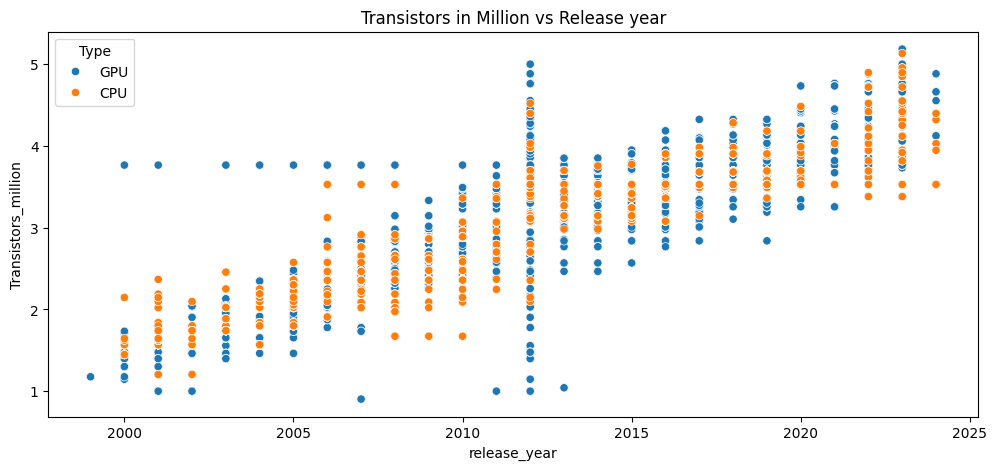

In [217]:
plt.figure(figsize=(12,5))



sns.scatterplot(x="release_year",
                    y="Transistors_million",
                    data=df,hue='Type')
plt.title("Transistors in Million vs Release year")
plt.show()


**Dannard Scaling is still valid in general.**

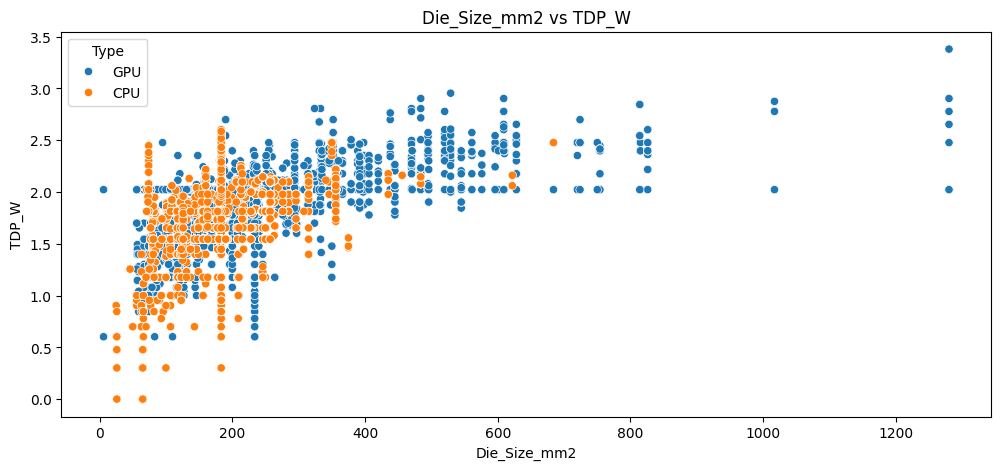

In [218]:
plt.figure(figsize=(12,5))



sns.scatterplot(x="Die_Size_mm2",
                    y="TDP_W",
                    data=df,hue='Type')
plt.title("Die_Size_mm2 vs TDP_W")
plt.show()

**CPUs have higher frequencies, but GPUs are catching up**

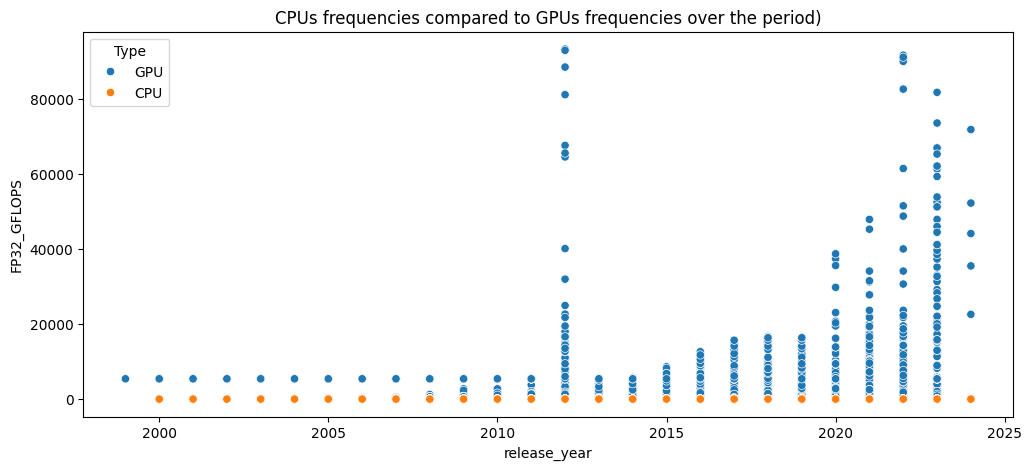

In [219]:
plt.figure(figsize=(12,5))


sns.scatterplot(x="release_year",
                    y="FP32_GFLOPS",
                    data=df,hue='Type')
plt.title("CPUs frequencies compared to GPUs frequencies over the period)")
plt.show()

**GPU performance doubles every 1.5 years**

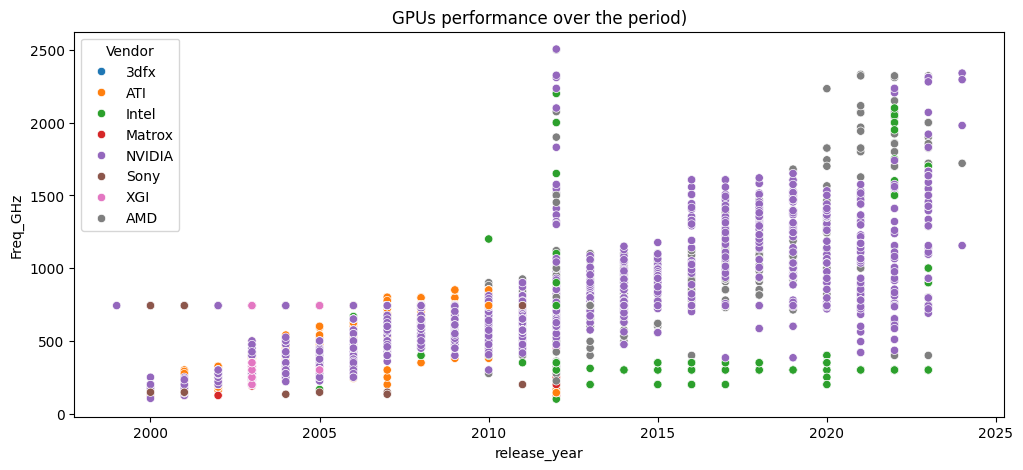

In [220]:
plt.figure(figsize=(12,5))



sns.scatterplot(x="release_year",
                    y="Freq_GHz",
                    data=df[df['Type']=='GPU'],hue='Vendor')
plt.title("GPUs performance over the period)")
plt.show()

**GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.**

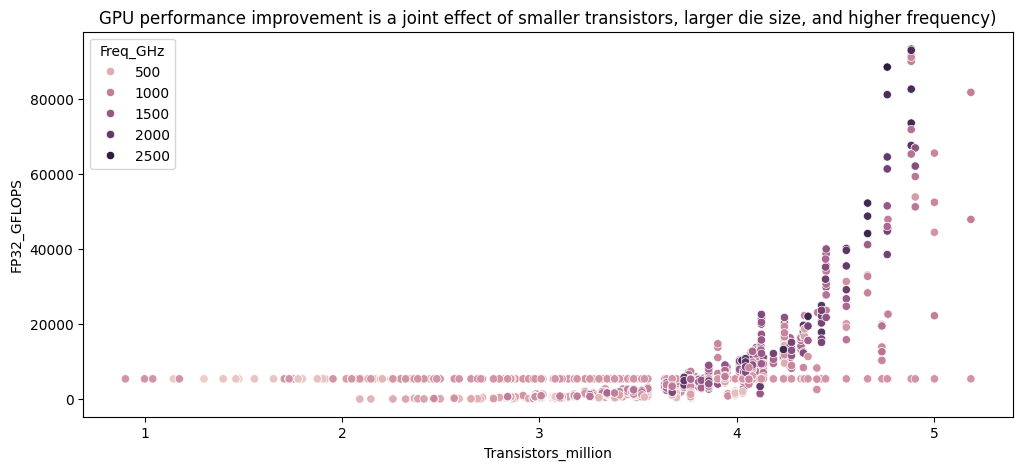

In [221]:
plt.figure(figsize=(12,5))



sns.scatterplot(x="Transistors_million",
                    y="FP32_GFLOPS",
                    data=df[df['Type']=='GPU'],hue='Freq_GHz')
plt.title("GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency)")
plt.show()

**High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years**

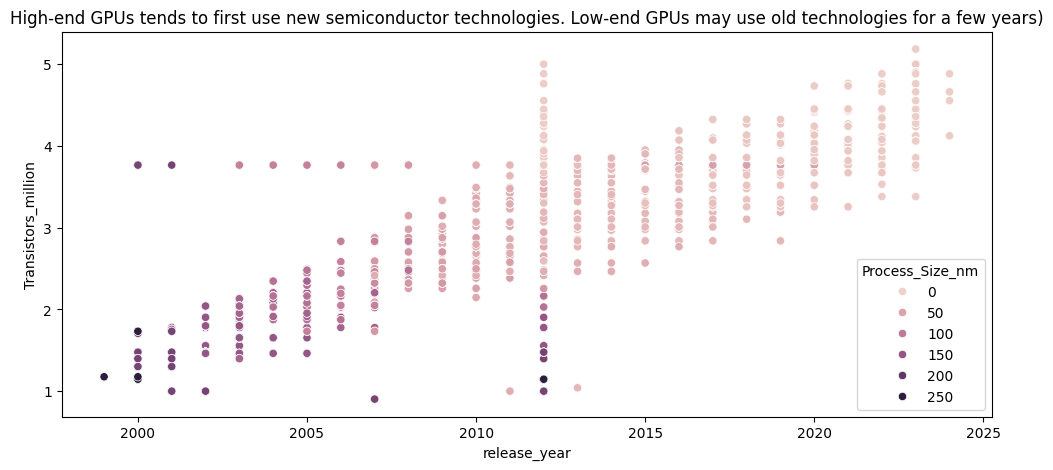

In [223]:
plt.figure(figsize=(12,5))


sns.scatterplot(x="release_year",
                    y="Transistors_million",
                    data=df[df['Type']=='GPU'],hue='Process_Size_nm')
plt.title("High-end GPUs tends to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years)")
plt.show()